In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math as mt

### Monty Hall Problem

Ci sono 3 porte, 1 sola è vincente:

1. scelgo 1 porta
2. si apre una delle due che non ho scelto e scopro che non è vincente
3. mi viene chiesto se voglio cambiare scelta
4. arriva un terzo che deve scegliere solo fra 2 porte perchè vede a priori l'altra aperta

Chi ha più probabilità di vincere, chi rimane con la prima scelta, chi cambia o chi arriva dopo?

In [2]:
keeper_wins = 0
switcher_wins = 0
later_wins = 0
rounds = 10000

for i in range(rounds):

  vec_game = np.zeros(3)
  win = np.random.randint(0,3)
  vec_game[win] = 1

  first_choice = np.random.randint(0,3)

  monty_opens = np.random.randint(0,3)
  while(monty_opens == first_choice or monty_opens == win):
    monty_opens = np.random.randint(0,3)

  second_choice = np.random.randint(0,3)
  while(second_choice == first_choice or second_choice == monty_opens):
    second_choice = np.random.randint(0,3)

  third_choice = np.random.randint(0,3)
  while(third_choice == monty_opens):
    third_choice = np.random.randint(0,3)

  keeper = first_choice
  switcher = second_choice
  later = third_choice

  if(keeper == win):
    keeper_wins += 1
  if(switcher == win):
    switcher_wins += 1
  if(later == win):
    later_wins += 1

print("Keeper win probability: ", 100*keeper_wins/rounds, "%")
print("Switcher win probability: ", 100*switcher_wins/rounds, "%")
print("Later win probability: ", 100*later_wins/rounds, "%")

Keeper win probability:  33.76 %
Switcher win probability:  66.24 %
Later win probability:  50.4 %


### Monty Hall Problem with N doors and p $\leq$ N Monty openings

In [3]:
N = 4

In [4]:
keeper_wins = 0
switcher_wins = 0
later_wins = 0
rounds = 10000

for i in range(rounds):

  vec_game = np.zeros(N)
  win = np.random.randint(0,N)
  vec_game[win] = 1

  first_choice = np.random.randint(0,N)

  monty_opens = np.random.randint(0,N)
  while(monty_opens == first_choice or monty_opens == win):
    monty_opens = np.random.randint(0,N)

  second_choice = np.random.randint(0,N)
  while(second_choice == first_choice or second_choice == monty_opens):
    second_choice = np.random.randint(0,N)

  third_choice = np.random.randint(0,N)
  while(third_choice == monty_opens):
    third_choice = np.random.randint(0,N)

  keeper = first_choice
  switcher = second_choice
  later = third_choice

  if(keeper == win):
    keeper_wins += 1
  if(switcher == win):
    switcher_wins += 1
  if(later == win):
    later_wins += 1

print("Keeper win probability: ", 100*keeper_wins/rounds, "%")
print("Switcher win probability: ", 100*switcher_wins/rounds, "%")
print("Later win probability: ", 100*later_wins/rounds, "%")

Keeper win probability:  24.53 %
Switcher win probability:  37.57 %
Later win probability:  33.54 %


In [5]:
p = 2
N = 5

In [6]:
keeper_wins = 0
switcher_wins = 0
later_wins = 0
rounds = 10000

for i in range(rounds):

  vec_game = np.zeros(N)
  win = np.random.randint(0,N)
  vec_game[win] = 1

  first_choice = np.random.randint(0,N)

  monty_opens = np.random.randint(0,N,size=p)
  while(first_choice in monty_opens or win in monty_opens):
    monty_opens = np.random.randint(0,N,size=p)

  second_choice = np.random.randint(0,N)
  while(second_choice == first_choice or second_choice in monty_opens):
    second_choice = np.random.randint(0,N)

  third_choice = np.random.randint(0,N)
  while(third_choice in monty_opens):
    third_choice = np.random.randint(0,N)

  keeper = first_choice
  switcher = second_choice
  later = third_choice

  if(keeper == win):
    keeper_wins += 1
  if(switcher == win):
    switcher_wins += 1
  if(later == win):
    later_wins += 1

print("Keeper win probability: ", 100*keeper_wins/rounds, "%")
print("Switcher win probability: ", 100*switcher_wins/rounds, "%")
print("Later win probability: ", 100*later_wins/rounds, "%")

Keeper win probability:  19.62 %
Switcher win probability:  35.72 %
Later win probability:  30.02 %


In [7]:
vec_keeper = []
vec_switcher = []
vec_later = []

for N in range(3, 10):
    
    keeper_wins = 0
    switcher_wins = 0
    later_wins = 0
    rounds = 10000

    for i in range(rounds):

      vec_game = np.zeros(N)
      win = np.random.randint(0,N)
      vec_game[win] = 1

      first_choice = np.random.randint(0,N)

      monty_opens = np.random.randint(0,N)
      while(monty_opens == first_choice or monty_opens == win):
        monty_opens = np.random.randint(0,N)

      second_choice = np.random.randint(0,N)
      while(second_choice == first_choice or second_choice == monty_opens):
        second_choice = np.random.randint(0,N)

      third_choice = np.random.randint(0,N)
      while(third_choice == monty_opens):
        third_choice = np.random.randint(0,N)

      keeper = first_choice
      switcher = second_choice
      later = third_choice

      if(keeper == win):
        keeper_wins += 1
      if(switcher == win):
        switcher_wins += 1
      if(later == win):
        later_wins += 1

    vec_keeper.append(keeper_wins/rounds)
    vec_switcher.append(switcher_wins/rounds)
    vec_later.append(later_wins/rounds)

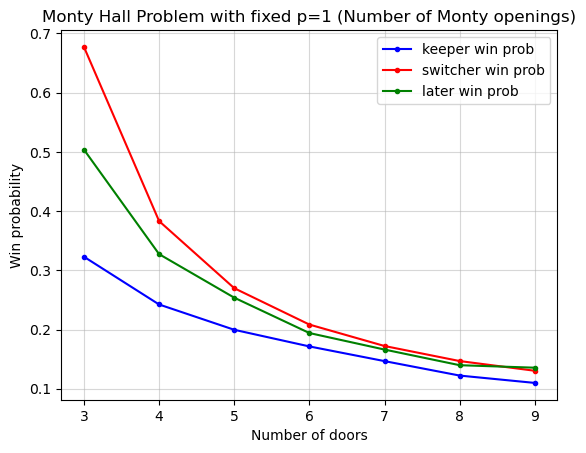

In [8]:
plt.plot(range(3, 10), vec_keeper, '.-b', label='keeper win prob')
plt.plot(range(3, 10), vec_switcher, '.-r', label='switcher win prob')
plt.plot(range(3, 10), vec_later, '.-g', label='later win prob')
plt.xlabel('Number of doors')
plt.ylabel('Win probability')
plt.title('Monty Hall Problem with fixed p=1 (Number of Monty openings)')
plt.grid(alpha=0.5)
plt.legend()
plt.show()
plt.close()

In [9]:
new_vec_keeper = []
new_vec_switcher = []
new_vec_later = []
N = 10

for p in range(1, N-1):
    
    keeper_wins = 0
    switcher_wins = 0
    later_wins = 0
    rounds = 10000

    for i in range(rounds):

      vec_game = np.zeros(N)
      win = np.random.randint(0,N)
      vec_game[win] = 1

      first_choice = np.random.randint(0,N)

      monty_opens = np.random.randint(0,N,size=p)
      while(first_choice in monty_opens or win in monty_opens):
        monty_opens = np.random.randint(0,N,size=p)

      second_choice = np.random.randint(0,N)
      while(second_choice == first_choice or second_choice in monty_opens):
        second_choice = np.random.randint(0,N)

      third_choice = np.random.randint(0,N)
      while(third_choice in monty_opens):
        third_choice = np.random.randint(0,N)

      keeper = first_choice
      switcher = second_choice
      later = third_choice

      if(keeper == win):
        keeper_wins += 1
      if(switcher == win):
        switcher_wins += 1
      if(later == win):
        later_wins += 1
          
    new_vec_keeper.append(keeper_wins/rounds)
    new_vec_switcher.append(switcher_wins/rounds)
    new_vec_later.append(later_wins/rounds)

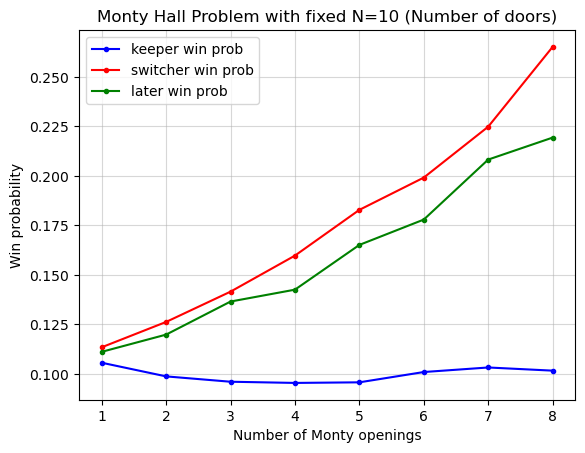

In [10]:
plt.plot(range(1, N-1), new_vec_keeper, '.-b', label='keeper win prob')
plt.plot(range(1, N-1), new_vec_switcher, '.-r', label='switcher win prob')
plt.plot(range(1, N-1), new_vec_later, '.-g', label='later win prob')
plt.xlabel('Number of Monty openings')
plt.ylabel('Win probability')
plt.title('Monty Hall Problem with fixed N=10 (Number of doors)')
plt.grid(alpha=0.5)
plt.legend()
plt.show()
plt.close()